In [1]:
# Name: Priyanshu jha (cse21165)


In [2]:
import pandas as pd
import numpy as np
print("Library import successfull")

Library import successfull


In [3]:
# Importing data
df = pd.read_excel("weather_data.xlsx")
print(df)

           Date      Time  Temperature F  Dew Point F  Humidity % Wind  \
0    2015-01-01  18:00:00             77           73          89  ESE   
1           NaT  18:30:00             77           73          89   SE   
2           NaT  19:00:00             75           73          94  ESE   
3           NaT  19:30:00             75           73          94   SE   
4           NaT  20:00:00             75           73          94  SSE   
...         ...       ...            ...          ...         ...  ...   
3300        NaT  01:09:00             61           61         100    E   
3301        NaT  01:30:00             59           59         100  VAR   
3302        NaT  02:00:00             61           61         100  VAR   
3303        NaT  02:30:00             63           63         100  VAR   
3304        NaT  03:00:00             66           66         100    E   

      Wind Speed mph  Wind Gust mph  Pressure in Precip.  Condition  
0                  7              0      

In [4]:
# Splitting the dataset 
from sklearn.model_selection import train_test_split
X = df[['Temperature F','Dew Point F','Humidity %','Wind Speed mph','Pressure in']]
y = df['Condition']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.4,random_state=42)


In [5]:
print(X_train.head())
print("---------------------------")
print(X_test.head())

      Temperature F  Dew Point F  Humidity %  Wind Speed mph  Pressure in
1317             79           79         100               3        26.86
2506             82           79          89               8        26.83
2164             77           77         100              10        26.78
426              73           55          53               5        26.99
494              66           66         100               1        26.97
---------------------------
      Temperature F  Dew Point F  Humidity %  Wind Speed mph  Pressure in
52               75           75         100               3        26.86
679              90           50          26               7        26.97
969              77           77         100               6        26.94
1251             81           75          84               5        26.94
203              73           72          94               7        26.97


In [6]:
# A1. Merge your train & test sets and remove the class labels. Use k-means algorithm with k = 3 or 5 
# (based on your dataset) to form the clusters.

from sklearn.cluster import KMeans

# Concatenate the features from train and test sets
X_merge = pd.concat([X_train, X_test], axis=0)

# Perform k-means clustering on features (X) without labels
k = 5  # You can change this value to 5 if necessary

# Initialize KMeans model
kmeans = KMeans(n_clusters=k, random_state=42)

# Fit KMeans to your combined dataset (X)
kmeans.fit(X_merge)

# Get cluster labels for each data point
cluster_labels = kmeans.labels_

# Add cluster labels to the original dataset (X)
X_merge['cluster'] = cluster_labels

# Display the resulting clusters
print(X_merge.head())


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


      Temperature F  Dew Point F  Humidity %  Wind Speed mph  Pressure in  \
1317             79           79         100               3        26.86   
2506             82           79          89               8        26.83   
2164             77           77         100              10        26.78   
426              73           55          53               5        26.99   
494              66           66         100               1        26.97   

      cluster  
1317        0  
2506        0  
2164        0  
426         1  
494         0  


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

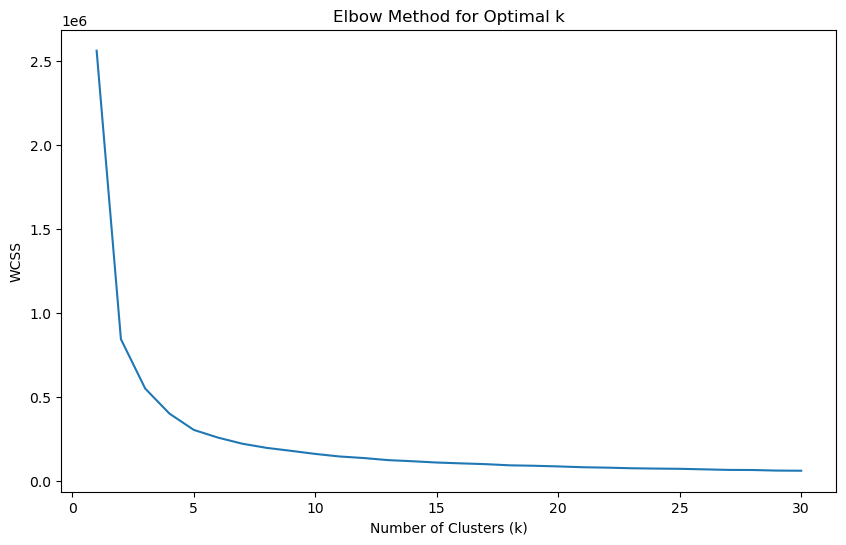

In [7]:
# A2. Determine the ideal k value for your dataset. Determine the clusters for a range of k ϵ [1,31]. Use 
# elbow method to determine the ideal value of k based on average Euclidean distance from cluster 
# center.
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
for i in range(1, 31):  # Trying k from 1 to 10
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_merge)
    wcss.append(kmeans.inertia_)  # Inertia is the WCSS

plt.figure(figsize=(10,6))
plt.plot(range(1, 31), wcss)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal k')
plt.show()
# The optimal value of k is seen in graph where sharp change in wss is appeared
# The optimal value of k = 3(approx)


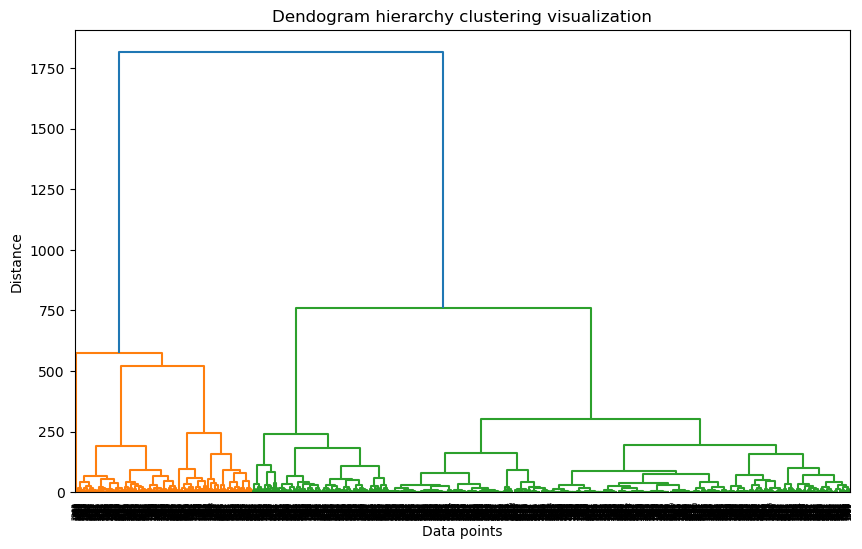

In [8]:
# A3  Use Agglomerative Clustering for hierarchical clustering of your data. Plot the dendrogram to 
# visualize the clusters
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt

# Performing Agglomerative Clustering

Z = hierarchy.linkage(X_merge, method="ward")

# Plotting the dendogram
plt.figure(figsize=(10,6))
db = hierarchy.dendrogram(Z)
plt.title("Dendogram hierarchy clustering visualization")
plt.xlabel("Data points")
plt.ylabel("Distance")
plt.show()

In [9]:
# A4. Perform sequential feature selection algorithms for arriving at the optimal number of features 
# needed for your dataset.



from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt


# Using KNN as an example classifier (Replace this with your own classifier)
knn = KNeighborsClassifier(n_neighbors=3)

k_fold = KFold(n_splits=5, shuffle=True, random_state=42)

# Sequential Forward Selection (SFS)
sfs = SequentialFeatureSelector(knn, n_features_to_select=3, direction='forward')
sfs.fit(X_train, y_train)

# Sequential Backward Selection (SBS)
sbs = SequentialFeatureSelector(knn, n_features_to_select=3, direction='backward')
sbs.fit(X_train, y_train)


# Optimal feature subsets selected by SFS and SBS
optimal_features_sfs = list(sfs.get_support(indices=True))
optimal_features_sbs = list(sbs.get_support(indices=True))

print("Optimal features selected by SFS:", optimal_features_sfs)
print("Optimal features selected by SBS:", optimal_features_sbs)


Optimal features selected by SFS: [0, 2, 4]
Optimal features selected by SBS: [0, 2, 3]


In [10]:
# A5. Perform PCA on your data set. Observe the variances along the principal components. Identify 
# the features needed to capture 95% of data variance. Let’s say the number of features needed is K.

from sklearn.decomposition import PCA
import numpy as np

# Assuming 'X' is your dataset
# Create an instance of PCA
pca = PCA()

# Fit PCA to your dataset
pca.fit(X_merge)

# Get the explained variances of the principal components
explained_variances = pca.explained_variance_ratio_

# Calculate cumulative explained variance
cumulative_variances = np.cumsum(explained_variances)

# Find the number of principal components needed to capture 95% variance
target_variance = 0.95
num_components_needed = np.argmax(cumulative_variances >= target_variance) + 1

# Transform the original dataset using the identified number of components
pca = PCA(n_components=num_components_needed)
X_transformed = pca.fit_transform(X)

# Output the number of components needed
print(f"Number of features needed to capture {target_variance*100}% of data variance(k): {num_components_needed}")


Number of features needed to capture 95.0% of data variance(k): 2


In [11]:
# A6. Transform your data with the initial K PC’s. Calculate the accuracy using the transformed 
# dataset.
# SVM is used to caculate accuracy of the model. Apart from this any model can be used.
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA


# Create an instance of PCA with the identified number of components (K)
pca = PCA(n_components=2)  # Use the previously identified 'num_components_needed'

# Fit PCA to the training data and transform both training and testing data
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Initialize a classifier (e.g., Support Vector Machine - SVM)
svm = SVC(random_state=42)

# Train the classifier using the transformed training data
svm.fit(X_train_pca, y_train)

# Predict the target labels using the transformed testing data
y_pred = svm.predict(X_test_pca)

# Calculate the accuracy of the classifier using the transformed dataset
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy using the transformed dataset with {num_components_needed} principal components: {accuracy:.4f}")


Accuracy using the transformed dataset with 2 principal components: 0.5182
